## Dependencies

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stat
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Load Dataset

In [2]:
df = pd.read_csv(filepath_or_buffer = "../data/CreditCard.csv",
                 index_col=0)

## Business Case Definition

#### The business problem we want to solve here: to find the effect of each of the variables separately on the "Credit card approval", and how collectively they are affecting the same response variable, so the bank could choose the most important variables out of these for running their quick customer diagnostics before approving a credit card.

## Feature Discription

* card : Factor. Was the application for a credit card accepted?
* reports : Number of major derogatory reports
* age : Age in years plus twelfths of a year.
* income : Yearly income (in USD 10,000).
* share : Ratio of monthly credit card expenditure to yearly income.
* expenditure : Average monthly credit card expenditure
* owner : Factor. Does the individual own their home?
* selfemp : Factor. Is the individual self-employed?
* dependents : Number of dependents.
* months : Months living at current address.
* majorcards : Number of major credit cards held.
* active : Number of active credit accounts.

## Basic Analysis

In [3]:
df.describe().head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000


### Overview of the Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1319 entries, 1 to 1319
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 134.0+ KB


In [5]:
df.isna().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

**The Following Inferences can be made by basic overview of the data**
1. There are three categorical features
2. There are no null values in the dataset
3. Target variable is 'Card'

# Univariate Analysis

## Numerical Variables

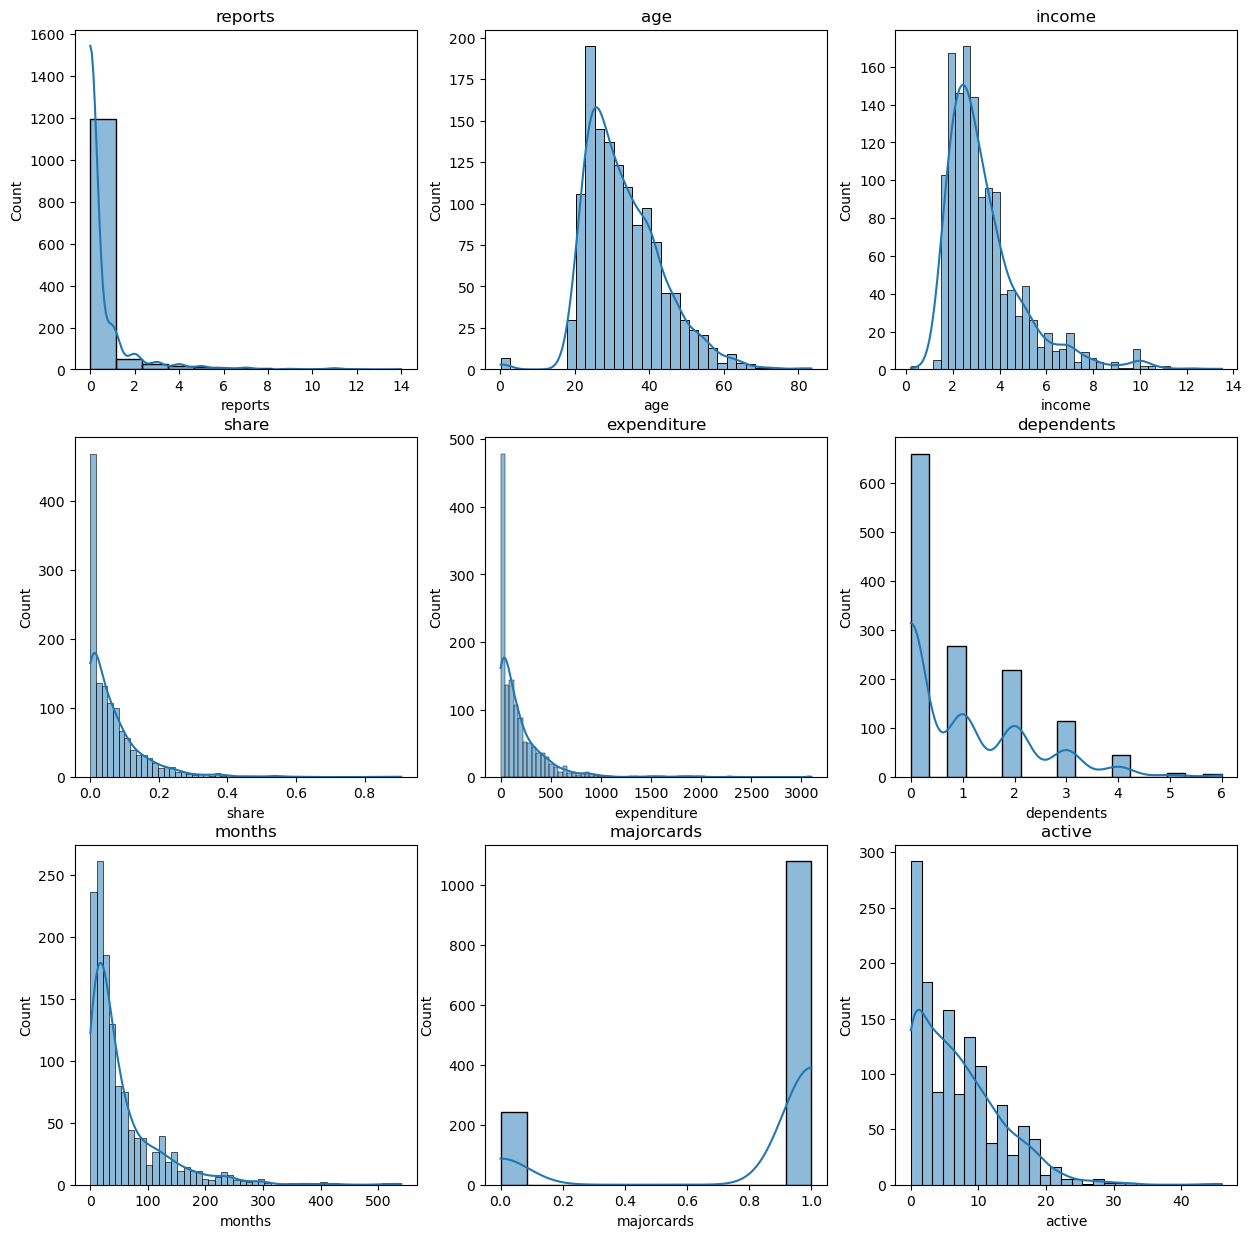

In [6]:
num = ['reports', 'age', 'income', 'share', 'expenditure','dependents', 'months', 'majorcards', 'active']

fig , axes = plt.subplots(3,3,figsize=[15,15])

for i,col in enumerate(num):
    sns.histplot(df[col],kde=True,ax=axes[i//3,i%3])
    # axes[i//3,i%3].hist(df[col],bins=20,density=True)
    axes[i//3,i%3].set_title(col)

plt.show()

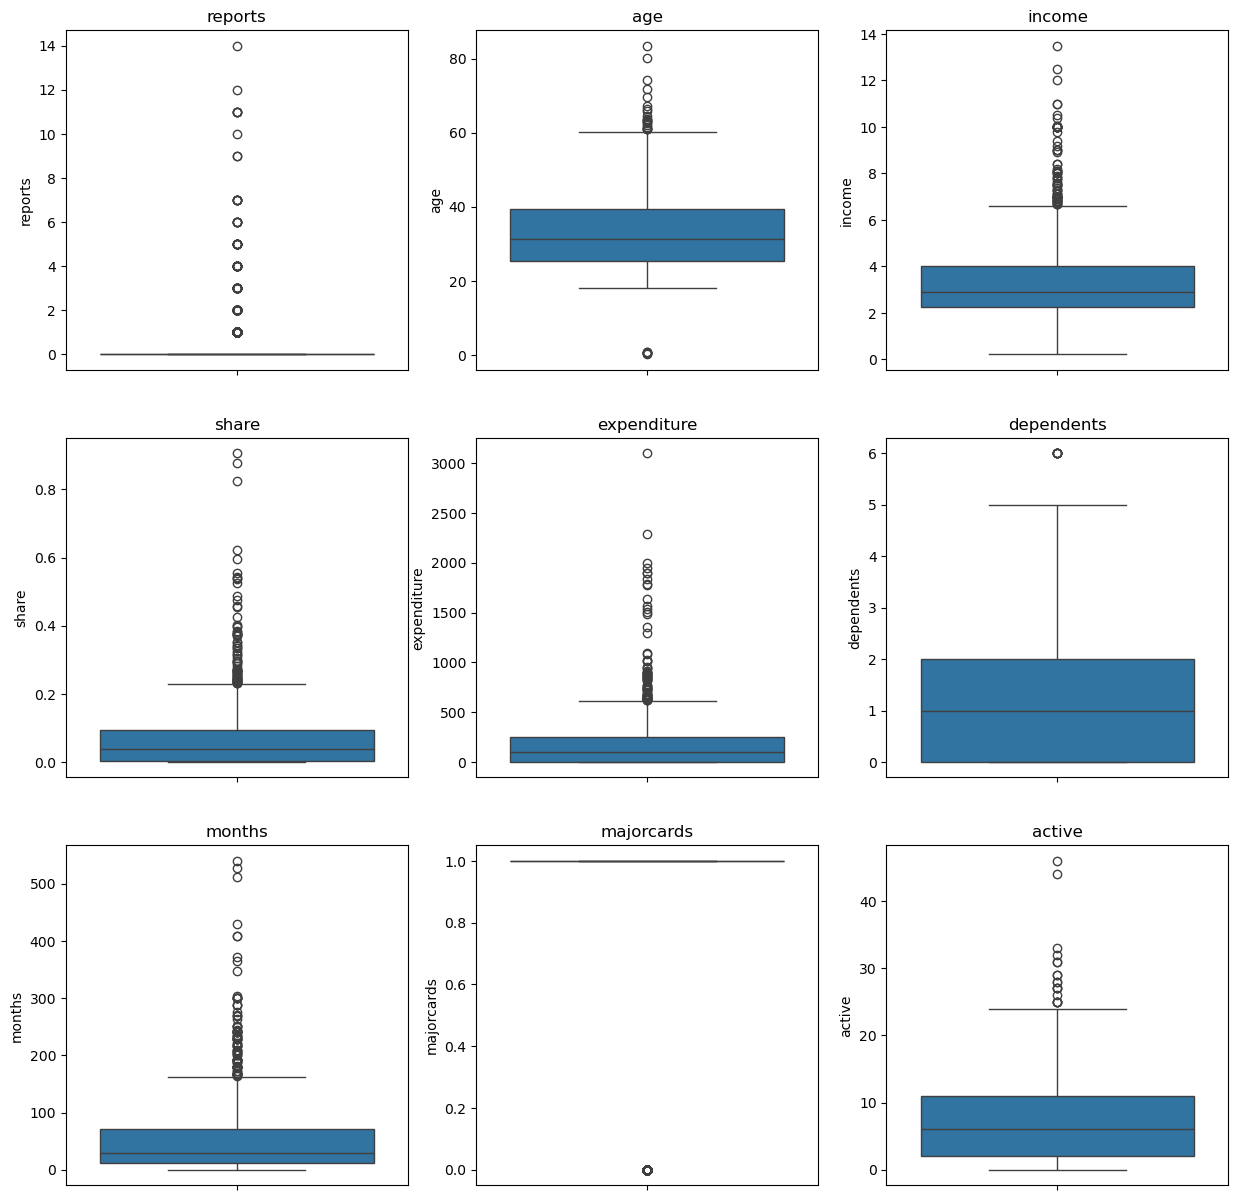

In [7]:
num = ['reports', 'age', 'income', 'share', 'expenditure','dependents', 'months', 'majorcards', 'active']

fig , axes = plt.subplots(3,3,figsize=[15,15])

for i,col in enumerate(num):
    sns.boxplot(df[col],fill=True,ax=axes[i//3,i%3])
    # axes[i//3,i%3].hist(df[col],bins=20,density=True)
    axes[i//3,i%3].set_title(col)

plt.show()

In [8]:
df.skew(numeric_only=True)

reports        4.884221
age            0.841428
income         1.928085
share          3.167606
expenditure    3.720321
dependents     1.234275
months         2.570304
majorcards    -1.644000
active         1.213365
dtype: float64

In [9]:
df.kurt(numeric_only=True)

reports        30.556681
age             1.472542
income          4.933327
share          16.253759
expenditure    22.281899
dependents      1.092424
months          9.478653
majorcards      0.703802
active          2.358621
dtype: float64

* **Reports** - Maximum number of people have 0 deregatory reports but there are many who have more than a few. The distribution is positively skewed and has heavy tails.
* **Age** - Most of the applicants are b/w 20-40 years and there are more ouliers in higher range. The distribution is positively skewed and is light tailed
* **Income** - Most of the applicants earn 20,000 to 40,000 dollars but there are some high earning individuals. The disribution is positively skewed and has light tails
* **Share** - Most ratios are close to zero which indicates people spend very less compared to how much they earn, but there are some outliers in the upper range. The distribution is positively skewed and is heavy tailed.
* **Expenditure** - Most people don't spend more than 500 dollars though there are many outliers. The distribution is positively skewed and heavy tailed.
* **Dependents** - Most people have 1-2 dependents but there are outliers. The distribution is positively skewed and light tailed
* **Months** - Most people have not lived more than 100 hours at their ccurrent address but there are many that have ,ived at their current address for many months.
* **Majorcards** - Most people have 1 major credit cards but those who don't is not insignificant. Skewness is negative and is lightailed
* **Active** - Most people have less than 10 active credit accounts but some outliers indicate more than 30. The distribution is positively skewed and has light tails.

## Categorical Variables

### Card The target variable

card
yes    1023
no      296
Name: count, dtype: int64


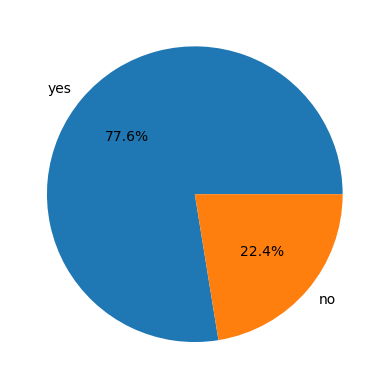

In [10]:
print(df['card'].value_counts())
plt.pie(df['card'].value_counts().values,labels=df['card'].value_counts().keys(),autopct="%1.1f%%")
plt.show()

**There are a lot more peope whose application was accepted**

### Other categorical variables

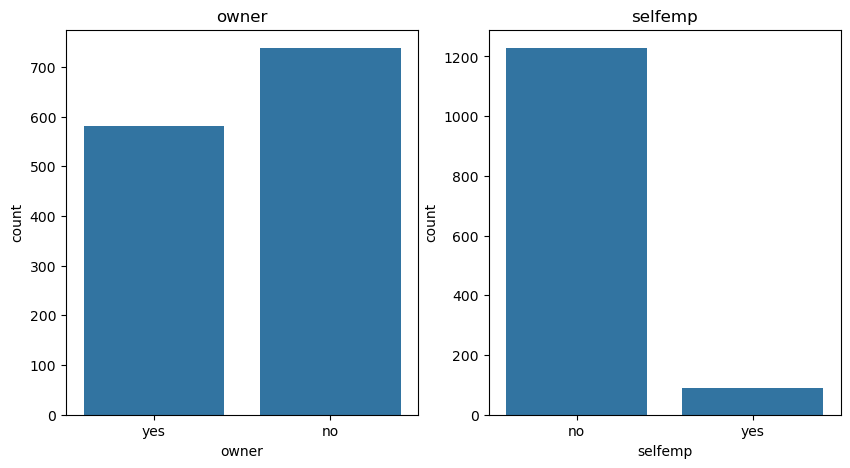

In [11]:
cat = ['owner','selfemp']

fig , axes = plt.subplots(1,2,figsize=[10,5])

for i,col in enumerate(cat):
    sns.countplot(df,x=col,ax=axes[i])
    axes[i].set_title(col)

plt.show()

* **Owner** - Most of the applicants do not own a house
* **Selfemp** - There are very few self employed applicants.

# Bivariate Analysis

## Against Target Variable

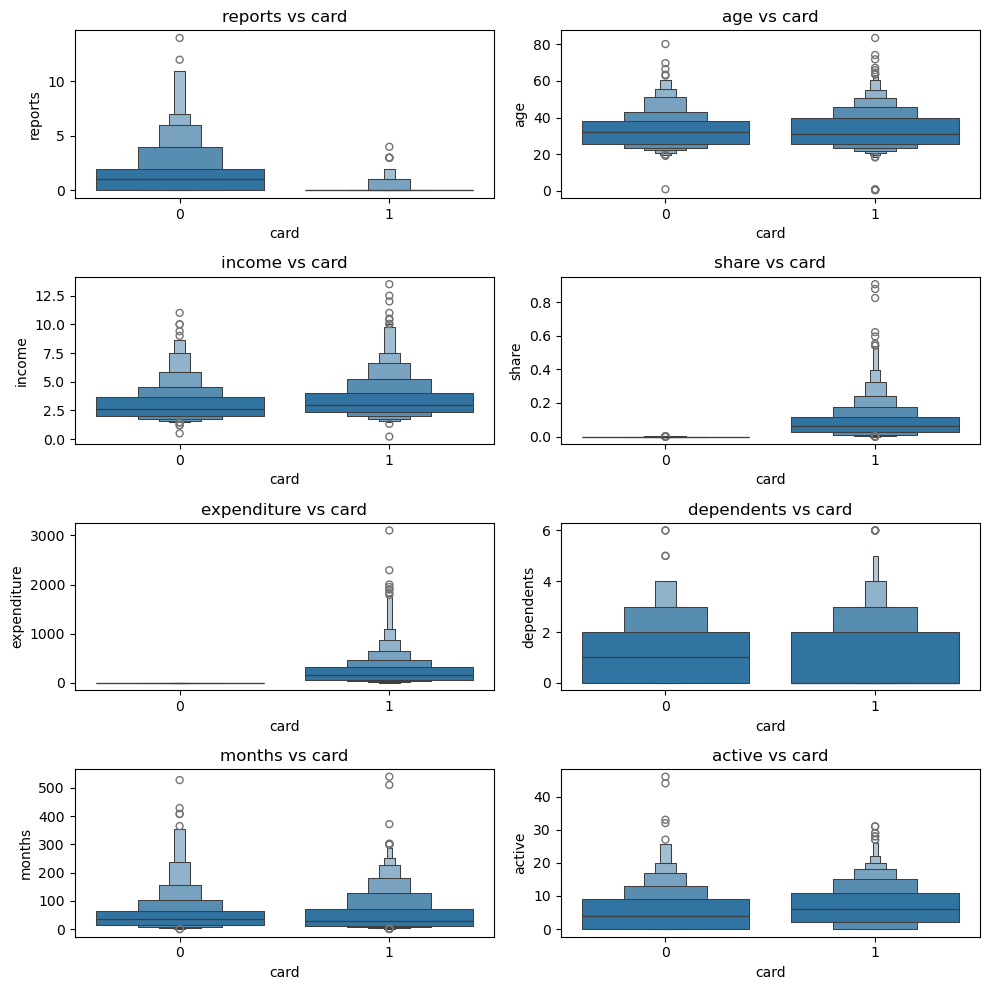

In [38]:
num = ['reports', 'age', 'income', 'share', 'expenditure','dependents', 'months', 'active']

fig , axes = plt.subplots(4,2,figsize=[10,10])

for i,col in enumerate(num):
    sns.boxenplot(df,x='card',y=col,ax=axes[i//2,i%2])
    axes[i//2,i%2].set_title(f"{col} vs card")
plt.tight_layout()
plt.show()

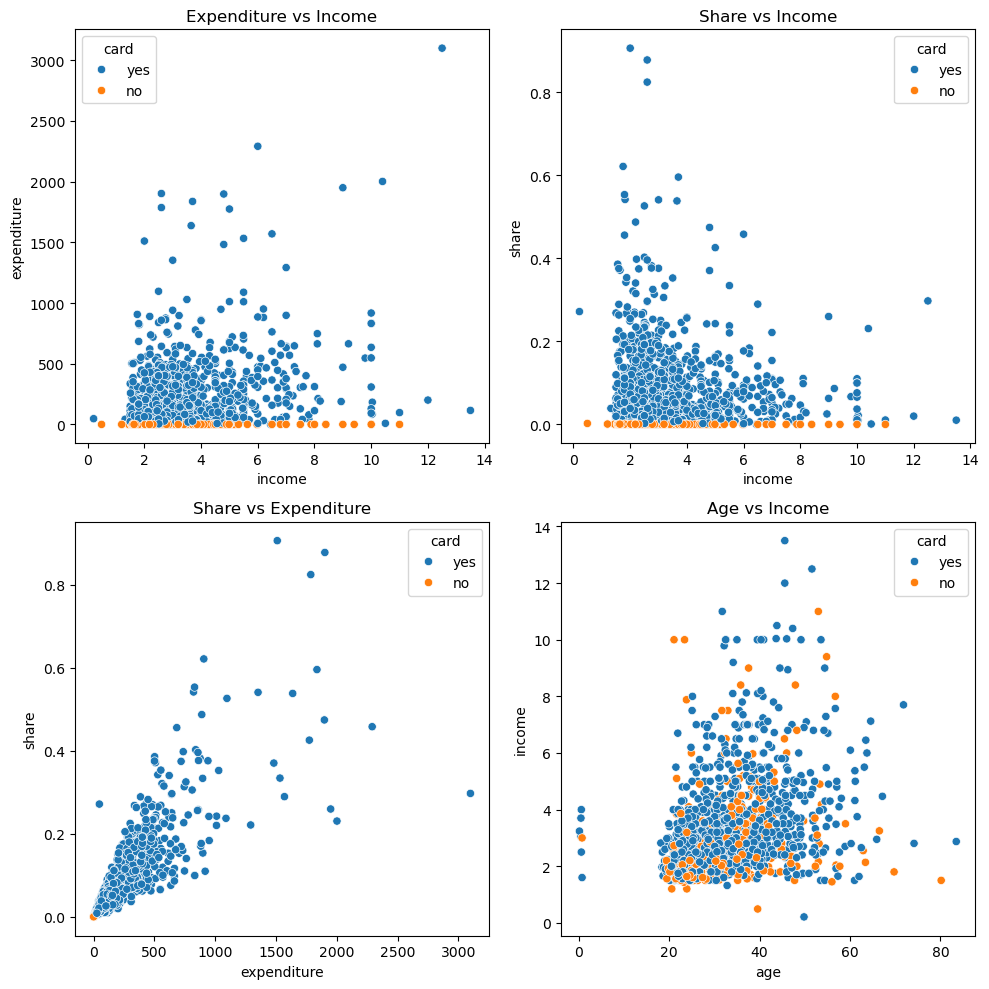

In [13]:
fig , axes = plt.subplots(2,2,figsize=[10,10])

sns.scatterplot(data=df,x='income',y='expenditure',hue='card',ax=axes[0,0])
axes[0,0].set_title("Expenditure vs Income")

sns.scatterplot(data=df,x='income',y='share',hue='card',ax=axes[0,1])
axes[0,1].set_title("Share vs Income")

sns.scatterplot(data=df,x='expenditure',y='share',hue='card',ax=axes[1,0])
axes[1,0].set_title("Share vs Expenditure")

sns.scatterplot(data=df,x='age',y='income',hue='card',ax=axes[1,1])
axes[1,1].set_title("Age vs Income")

plt.tight_layout()
plt.show()

In [14]:
tab_card_vs_owner = pd.crosstab(df['card'],df['owner'])
tab_card_vs_owner

owner,no,yes
card,,
no,206,90
yes,532,491


In [18]:
stat,p_val,dof,expected=chi2_contingency(tab_card_vs_owner)

stat,p_val,dof,expected

(28.11407333689662,
 1.1437115047558142e-07,
 1,
 array([[165.61637604, 130.38362396],
        [572.38362396, 450.61637604]]))

In [21]:
group1 = df[df['card']=='yes']['income']
group2 = df[df['card']=='no']['income']

stat.ttest_ind(group1,group2)

TtestResult(statistic=3.4377883877255977, pvalue=0.0006047776915757772, df=1317.0)

## **Insights**

#### **Income and Expenditure Relationship with Credit Card Approval:**

* Individuals with higher income and expenditure have a higher likelihood of credit card approval.
* Lower-income individuals tend to have lower expenditures and a lower approval rate.

#### **Credit Share Trends:**

* Credit Share vs. Income: Higher-income individuals tend to have a lower proportion of their income spent on credit.
* Credit Share vs. Expenditure: Higher expenditure is associated with a higher share of credit usage, which may indicate higher credit dependency.

#### **Age vs. Income Trends:**

* Older individuals tend to have higher income, making them more likely to get approved.
* Younger individuals, especially those with lower incomes, have a lower probability of approval.

#### **Impact of Reports on Approval:**

* Individuals with higher derogatory reports (negative credit history) tend to have a lower approval rate.
* This suggests that past credit behavior plays a significant role in determining approvals.

#### **Dependents and Credit Card Approval:**

* Individuals with fewer dependents are more likely to be approved.
* More dependents may indicate higher financial obligations, affecting approval chances.

#### **Months Active and Credit Approval:**

* Longer active periods in financial transactions correlate with a higher approval rate.
* Shorter activity periods might indicate new customers or individuals with limited credit history, leading to lower approvals.

#### **Chi-Square Test for owner and card:**

* A significant p-value suggests that homeownership has a statistical relationship with credit card approval.
* Homeowners are more likely to be approved for a credit card compared to non-homeowners.

# Multivariate

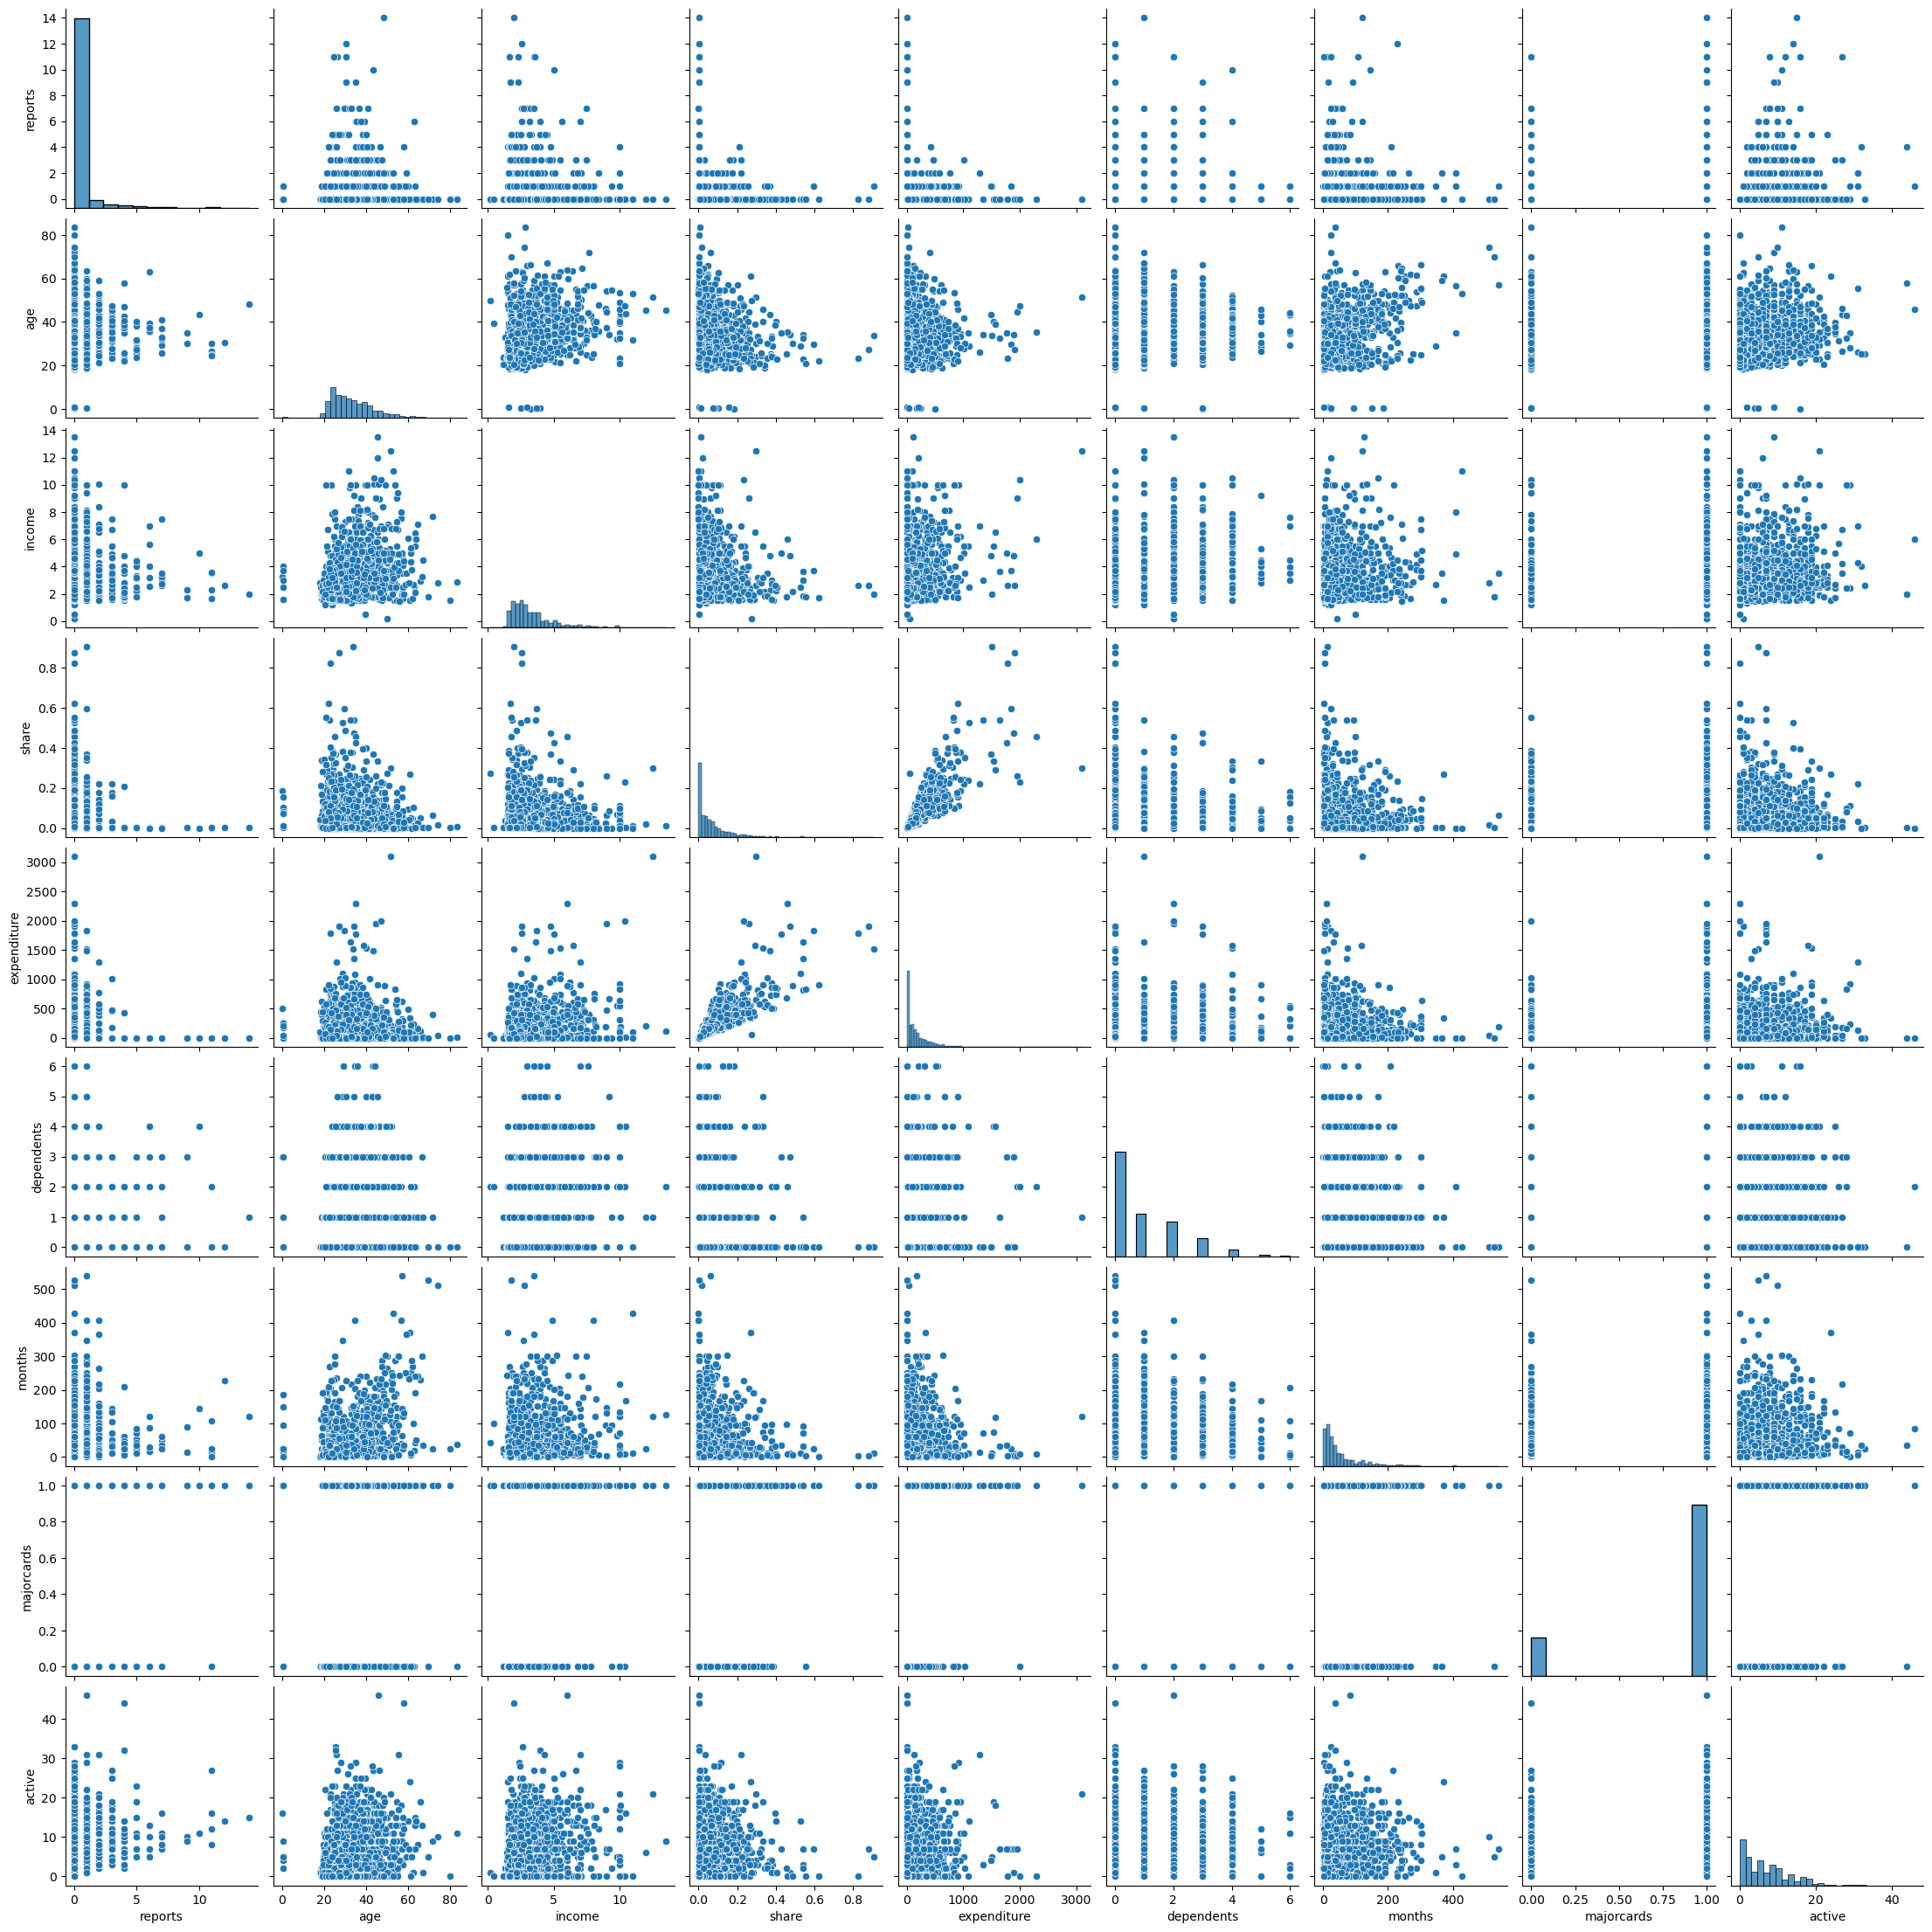

In [22]:
sns.pairplot(df)
plt.show()

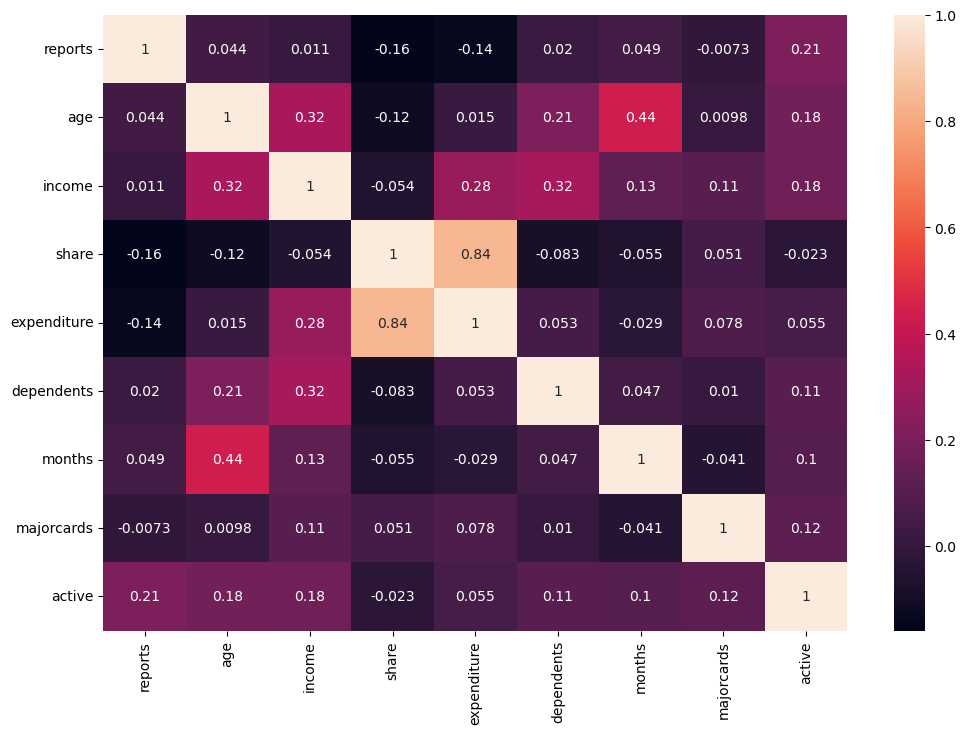

In [23]:
num = ['reports', 'age', 'income', 'share', 'expenditure','dependents', 'months', 'majorcards', 'active']

plt.figure(figsize=[12,8])
sns.heatmap(data=df.corr(numeric_only=True),annot=True)

plt.show()

## PCA (Principal Component Analysis)

In [24]:
le = LabelEncoder()
cols = ['card','owner','selfemp']
df_enc = df
for i in cols:
    df_enc[i] = le.fit_transform(df[i])


In [25]:
scale=StandardScaler()

df_sca =pd.DataFrame(scale.fit_transform(df_enc),columns=df.columns)

In [26]:
df_dep = df_sca['card']
df_ind = df_sca.drop(labels='card',axis='columns')
pca = PCA(n_components=11)

x_pca = pca.fit_transform(df_ind)

pca.explained_variance_ratio_

array([0.20892775, 0.17655626, 0.10508225, 0.09768874, 0.08973779,
       0.0865658 , 0.07065312, 0.0599222 , 0.05002672, 0.04603798,
       0.0088014 ])

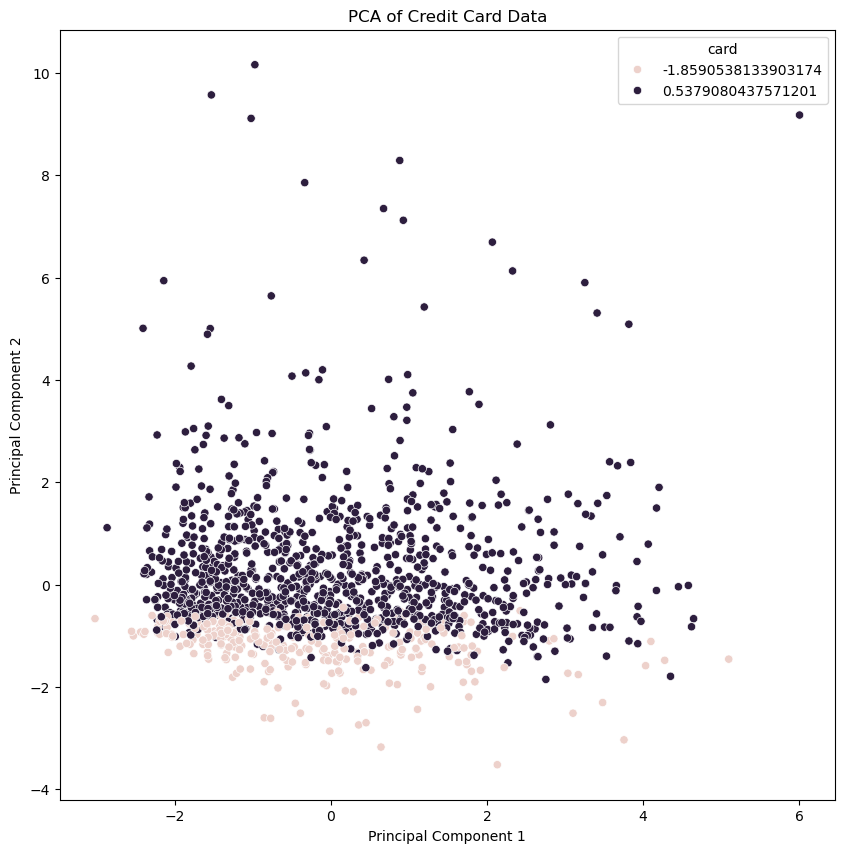

In [28]:
# Plot PCA
plt.figure(figsize=(10, 10))

sns.scatterplot(x   = x_pca[:, 0], 
                y   = x_pca[:, 1], 
                hue = df_dep)

plt.title('PCA of Credit Card Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Cluster Analysis

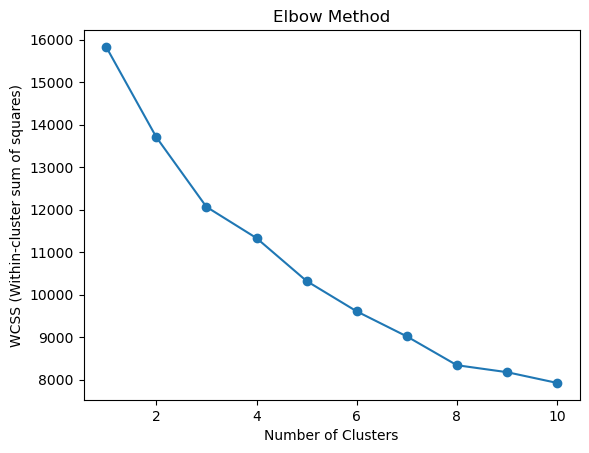

In [29]:
wcss = []
max_clusters = 10

for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_sca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, max_clusters+1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

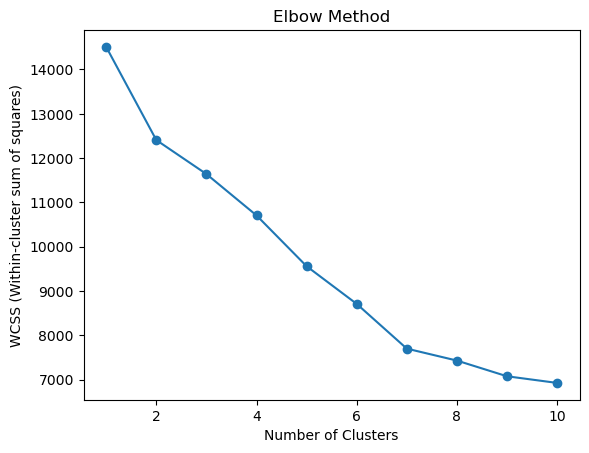

In [30]:
wcss = []
max_clusters = 10

for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_ind)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, max_clusters+1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

For n_clusters = 2, the silhouette score is 0.1860463094251177
For n_clusters = 3, the silhouette score is 0.13528518043972038
For n_clusters = 4, the silhouette score is 0.14689143482045947
For n_clusters = 5, the silhouette score is 0.17950591239416847
For n_clusters = 6, the silhouette score is 0.19213333562291787
For n_clusters = 7, the silhouette score is 0.2123154485000824
For n_clusters = 8, the silhouette score is 0.21096722427652753
For n_clusters = 9, the silhouette score is 0.2057233259209388
For n_clusters = 10, the silhouette score is 0.20484981267975538


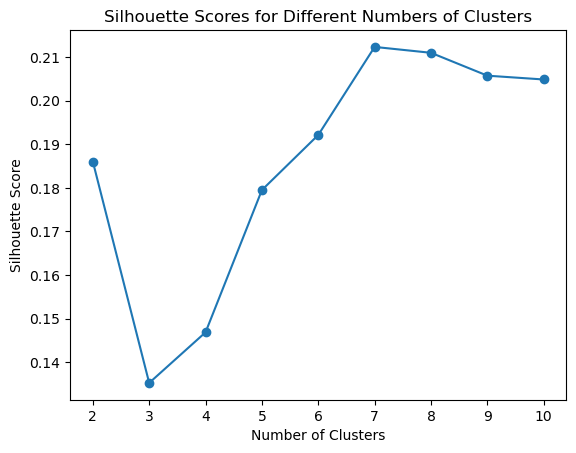

In [31]:
range_n_clusters = range(2, 11)

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_ind)
    silhouette_avg = silhouette_score(df_ind, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg}')

plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [32]:
# Let's fit number of optimal clusters
kmeans = KMeans(n_clusters=7, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(df_sca)

# Add the cluster labels to the original data
df['Cluster'] = kmeans.labels_

In [33]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,Cluster
1,1,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12,2
2,1,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13,1
3,1,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5,2
4,1,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7,1
5,1,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5,2


In [34]:
cols = list(df.columns)
cols.remove('Cluster')

In [35]:
cluster_summary = df.groupby(by='Cluster')[cols].mean()
cluster_summary

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
Cluster,,,,,,,,,,,,
0,0.848214,0.196429,49.038691,4.007474,0.049020,153.013518,0.767857,0.008929,1.089286,203.723214,0.776786,7.651786
1,0.835417,0.112500,28.372396,2.663821,0.061396,132.032883,0.122917,0.000000,0.458333,33.585417,1.000000,5.210417
2,0.895425,0.189542,36.735839,4.442523,0.057915,207.514923,0.924837,0.000000,1.928105,41.882353,0.970588,10.065359
3,0.000000,4.355556,34.274074,3.261633,0.000428,0.000000,0.344444,0.033333,1.033333,51.933333,0.877778,11.111111
4,1.000000,0.112676,29.780516,3.456783,0.352588,949.237549,0.436620,0.014085,0.830986,40.295775,0.901408,6.253521
5,0.689655,0.247126,29.335249,2.704354,0.053834,117.098419,0.270115,0.000000,0.724138,44.580460,0.000000,4.270115
6,0.720930,0.290698,36.656007,3.982694,0.041115,143.097922,0.511628,1.000000,1.174419,68.046512,0.825581,7.023256


-------------------------
## Cluster-wise Insights

### **Cluster 0:**
- **card**: 0.848214
- **reports**: 0.196429
- **age**: 49.038691
- **income**: 4.007474
- **share**: 0.049020
- **expenditure**: 153.013518
- **owner**: 0.767857
- **selfemp**: 0.008929
- **dependents**: 1.089286
- **months**: 203.723214
- **majorcards**: 0.776786
- **active**: 7.651786

**Insight**: This cluster represents older individuals with moderate income and expenditure. They are mostly homeowners, not self-employed, and have been with the institution for a long duration. They have a moderate number of dependents and a high number of active accounts.

---

### **Cluster 1:**
- **card**: 0.835417
- **reports**: 0.112500
- **age**: 28.372396
- **income**: 2.663821
- **share**: 0.061396
- **expenditure**: 132.032883
- **owner**: 0.122917
- **selfemp**: 0.000000
- **dependents**: 0.458333
- **months**: 33.585417
- **majorcards**: 1.000000
- **active**: 5.210417

**Insight**: This cluster represents younger individuals with low income and expenditure. They are mostly renters, not self-employed, and have fewer dependents. Their tenure with the institution is relatively short, and they have a single major credit card.

---

### **Cluster 2:**
- **card**: 0.895425
- **reports**: 0.189542
- **age**: 36.735839
- **income**: 4.442523
- **share**: 0.057915
- **expenditure**: 207.514923
- **owner**: 0.924837
- **selfemp**: 0.000000
- **dependents**: 1.928105
- **months**: 41.882353
- **majorcards**: 0.970588
- **active**: 10.065359

**Insight**: This cluster represents middle-aged individuals with moderate to high income and expenditure. Most of them are homeowners with a high number of dependents. They are not self-employed and have been associated with the institution for a medium tenure.

---

### **Cluster 3:**
- **card**: 0.000000
- **reports**: 4.355556
- **age**: 34.274074
- **income**: 3.261633
- **share**: 0.000428
- **expenditure**: 0.000000
- **owner**: 0.344444
- **selfemp**: 0.033333
- **dependents**: 1.033333
- **months**: 51.933333
- **majorcards**: 0.877778
- **active**: 11.111111

**Insight**: This cluster represents individuals with very low or no expenditure, a moderate income, and high reports of delinquencies. They are a mix of homeowners and renters, with moderate dependents and tenure. They have an above-average number of active accounts but no credit card usage.

---

### **Cluster 4:**
- **card**: 1.000000
- **reports**: 0.112676
- **age**: 29.780516
- **income**: 3.456783
- **share**: 0.352588
- **expenditure**: 949.237549
- **owner**: 0.436620
- **selfemp**: 0.014085
- **dependents**: 0.830986
- **months**: 40.295775
- **majorcards**: 0.901408
- **active**: 6.253521

**Insight**: This cluster represents young individuals with high credit card usage and very high expenditure. They have a moderate income and are a mix of renters and homeowners. They have relatively fewer dependents and an average tenure with the institution.

---

### **Cluster 5:**
- **card**: 0.689655
- **reports**: 0.247126
- **age**: 29.335249
- **income**: 2.704354
- **share**: 0.053834
- **expenditure**: 117.098419
- **owner**: 0.270115
- **selfemp**: 0.000000
- **dependents**: 0.724138
- **months**: 44.580460
- **majorcards**: 0.000000
- **active**: 4.270115

**Insight**: This cluster represents younger individuals with low income and low expenditure. They have a moderate level of credit card usage, are mostly renters, and have very low involvement in major credit cards. They have an average tenure and a few dependents.

---

### **Cluster 6:**
- **card**: 0.720930
- **reports**: 0.290698
- **age**: 36.656007
- **income**: 3.826944
- **share**: 0.041115
- **expenditure**: 143.097922
- **owner**: 0.511628
- **selfemp**: 1.000000
- **dependents**: 1.174419
- **months**: 68.046512
- **majorcards**: 0.825581
- **active**: 7.023256

**Insight**: This cluster represents self-employed individuals with moderate income and expenditure. They have a balanced mix of renters and homeowners, moderate dependents, and a relatively long tenure with the institution. They have a reasonable number of active accounts and major credit cards.

---



## General Observations
### 1) Stable and High-Income Clusters (Clusters 0 and 6):
These clusters have moderate to high incomes, long credit histories, and responsible usage. They are good candidates for premium credit offerings.

### 2) High-Risk Cluster (Cluster 2):
Cluster 2 represents a high-risk group with high credit usage, frequent spending, and a likelihood of overextension.

### 3) Younger, Low-Income Clusters (Clusters 3, 4, and 5):
These clusters represent younger individuals with low to moderate incomes. Cluster 4 has extremely high expenditure, indicating potential financial risk.

### 4) Moderate-Risk, Emerging Users (Cluster 1):
Cluster 1 consists of younger individuals with moderate incomes who are actively using credit but might lack a long credit history.



In [36]:
# Check the distribution of credit card approval within each cluster
approval_distribution = df.groupby('Cluster')['card'].value_counts(normalize=True)
approval_distribution

Cluster  card
0        1       0.848214
         0       0.151786
1        1       0.835417
         0       0.164583
2        1       0.895425
         0       0.104575
3        0       1.000000
4        1       1.000000
5        1       0.689655
         0       0.310345
6        1       0.720930
         0       0.279070
Name: proportion, dtype: float64

## Cluster-wise approval Distribution
---

### **Cluster 0:**

* Approval Rate (Yes): 84.82%  
* Rejection Rate (No): 15.18%  

**Insight**: This cluster has a high approval rate. Based on previous insights, individuals in this cluster have higher income, moderate expenditure, and relatively stable financial conditions. The low rejection rate indicates strong creditworthiness, making them ideal candidates for credit products.

### **Cluster 1:**

* Approval Rate (Yes): 83.54%  
* Rejection Rate (No): 16.46%  

**Insight**: Similar to Cluster 0, this group has a high approval rate. Their slightly lower acceptance rate suggests they may have some minor financial risks, but overall, they are still in the safe zone for credit approvals.

### **Cluster 2:**

* Approval Rate (Yes): 89.54%  
* Rejection Rate (No): 10.46%  

**Insight**: This cluster has the highest approval rate, which may indicate strong financial standing. However, given their high expenditure, financial institutions might still need to assess their risk tolerance carefully before granting additional credit.

### **Cluster 3:**

* Approval Rate (Yes): 100.00%  
* Rejection Rate (No): 0.00%  

**Insight**: Every individual in this cluster was approved, which suggests they are in an extremely low-risk group. Their strong financial profiles make them the best candidates for credit expansion.

### **Cluster 4:**

* Approval Rate (Yes): 100.00%  
* Rejection Rate (No): 0.00%  

**Insight**: Similar to Cluster 3, this group has a perfect approval rate. These individuals likely have the best credit behavior and financial stability, making them excellent candidates for premium credit offers.

### **Cluster 5:**

* Approval Rate (Yes): 68.97%  
* Rejection Rate (No): 31.03%  

**Insight**: This cluster has a moderate approval rate. While many individuals qualify for a credit card, a significant portion is being rejected, possibly due to financial instability, lower income, or high expenditure compared to their earnings.

### **Cluster 6:**

* Approval Rate (Yes): 72.09%  
* Rejection Rate (No): 27.91%  

**Insight**: This cluster has a slightly better approval rate than Cluster 5 but still has a notable rejection percentage. These individuals may have some financial risks that warrant further evaluation before granting credit.
